In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir("C:\Work_NN\PythonDirectory\Sales_prediction")

In [3]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df_trans=pd.read_excel('TransactionData.xlsx')

# Data

In [5]:
df_trans.head()

,Sold-to Customer,Customer Name,NACS Category,NACS Name,Qty,Sales,BAC,FC
0,10000,TOWNE CLUB,201004,American Spirit,17.0,1260.10,840.98,0.0
1,10000,TOWNE CLUB,201012,Camel,100.0,6791.10,4443.67,0.0
2,10000,TOWNE CLUB,201020,Carlton,25.0,2057.55,1432.70,0.0
3,10000,TOWNE CLUB,201034,Kool,15.0,1022.95,667.00,0.0
4,10000,TOWNE CLUB,201042,Marlboro,858.6,58397.54,38292.64,0.0


In [6]:
df_nacs=pd.read_excel('02. Convert Nacs To POG 5-22-17.xlsx')
df_nacs.head()

,NACS Category,NACS Description,Planogram
0,201002,American Spirit Organic,Cigarettes
1,201004,American Spirit,Cigarettes
2,201009,Benson & Hedges Deluxe,Cigarettes
3,201010,Benson & Hedges,Cigarettes
4,201011,Camel Regular,Cigarettes


In [7]:
df_tran_pog=pd.merge(df_trans, df_nacs, how='left',on='NACS Category')
df_tran_pog.head()

,Sold-to Customer,Customer Name,NACS Category,NACS Name,Qty,Sales,BAC,FC,NACS Description,Planogram
0,10000,TOWNE CLUB,201004,American Spirit,17.0,1260.10,840.98,0.0,American Spirit,Cigarettes
1,10000,TOWNE CLUB,201012,Camel,100.0,6791.10,4443.67,0.0,Camel,Cigarettes
2,10000,TOWNE CLUB,201020,Carlton,25.0,2057.55,1432.70,0.0,Carlton,Cigarettes
3,10000,TOWNE CLUB,201034,Kool,15.0,1022.95,667.00,0.0,Kool,Cigarettes
4,10000,TOWNE CLUB,201042,Marlboro,858.6,58397.54,38292.64,0.0,Marlboro,Cigarettes


In [8]:
df_inline=df_tran_pog[df_tran_pog['Planogram'] =='Inline Candy' ]
df_inline

,Sold-to Customer,Customer Name,NACS Category,NACS Name,Qty,Sales,BAC,FC,NACS Description,Planogram
37,10000,TOWNE CLUB,803002,Hershey Choc Bar-24 Ct,2.000,32.64,28.22,29.28,Hershey Choc Bar-24 Ct,Inline Candy
38,10000,TOWNE CLUB,803005,Hershey Choc Bar Other,7.000,111.54,96.42,100.04,Hershey Choc Bar Other,Inline Candy
39,10000,TOWNE CLUB,803010,Mars Choc Bar Oth,2.000,57.14,49.39,51.24,Mars Choc Bar Oth,Inline Candy
40,10000,TOWNE CLUB,803015,Nestle Choc Bar Oth,1.000,24.49,21.17,21.96,Nestle Choc Bar Oth,Inline Candy
41,10000,TOWNE CLUB,803023,King Size Hershey Choc Bar-24 Ct,1.000,28.90,24.93,25.92,King Size Hershey Choc Bar-24 Ct,Inline Candy
42,10000,TOWNE CLUB,803025,King Size Hershey Choc Bar Other,0.000,6.52,-0.02,0.00,King Size Hershey Choc Bar Other,Inline Candy
43,10000,TOWNE CLUB,803028,King Size Mars Choc Bar-24Ct,1.000,29.44,25.40,26.40,King Size Mars Choc Bar-24Ct,Inline Candy
44,10000,TOWNE CLUB,803035,King Size Nestle Choc Bar Other,1.000,21.68,18.70,19.44,King Size Nestle Choc Bar Other,Inline Candy
118,10010,DEXTER MOBIL,803002,Hershey Choc Bar-24 Ct,9.333,144.84,128.08,132.98,Hershey Choc Bar-24 Ct,Inline Candy
119,10010,DEXTER MOBIL,803005,Hershey Choc Bar Other,47.938,856.42,774.88,803.98,Hershey Choc Bar Other,Inline Candy


In [9]:
df_inline_1=df_inline.groupby(['Sold-to Customer']).sum().reset_index()
df_inline_1.head()

,Sold-to Customer,NACS Category,Qty,Sales,BAC,FC
0,10000,6424143,15.000,312.35,264.21,274.28
1,10010,19281802,325.889,6616.20,5985.69,6216.20
2,10016,12048469,175.514,4976.42,4096.44,4252.48
3,10019,13656488,48.906,1041.17,935.08,969.02
4,10032,20888870,588.072,15739.22,13879.37,14430.03


In [10]:
print(df_inline_1.shape)
print(df_inline_1.nunique())

(5693, 6)
Sold-to Customer    5693
NACS Category       3869
Qty                 4643
Sales               5663
BAC                 5615
FC                  4411
dtype: int64


In [11]:
df_store=pd.read_csv('StoreLayout.csv')
df_store['Id']=df_store['Id'].str[2:]

C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (16,22,26,28,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df_store.drop( columns=['IsDeleted','Name','RecordTypeId','CreatedDate','CreatedById','LastModifiedDate',
                        'LastModifiedById','SystemModstamp','LastActivityDate','Chain_Name__c',
                        'Planogram_Summary_OTP__c','OTP_Sales_Status__c','Planogram_Summary_Gum_Mint__c',
                        'Planogram_Summary_HBC__c','Combined_Snuff_Cigar_Fixture__c','Planogram_Summary_Inline_Candy__c',
                        'Planogram_Summary_Theater_Candy__c','Planogram_Summary_Peg_Bag_Candy__c',
                        'Planogram_Summary_Novelty_Candy__c','Planogram_Summary_Salty_Snacks__c',
                        'Combined_Gum_Mints_In_Line_Candy__c','Planogram_Summary_Nuts_Seeds__c',
                        'Planogram_Summary_Cookie_Sweet_Breakfast__c','Planogram_Summary_Meat_Snacks__c',
                        'Racking__c','Planogram_Summary_Edible_Grocery__c','Rack_Size_Limits__c',
                        'Planogram_Summary_Paper_Pet_Cleaning__c','Planogram_Summary_General_Merchandise__c',
                        'Theatre_Peg_Candy_Combined_Section__c','Planogram_Summary_Automotive__c','Gum_Mint_Sales_Status__c',
                        'Combined_Novelty_Peg_Candy_Section__c','HBC_Sales_Status__c','Inline_Candy_Sales_Status__c',
                        'Theater_Candy_Sales_Status__c','Peg_Bag_Candy_Sales_Status__c','Novelty_Candy_Sales_Status__c',
                        'Theater_Over_Gondola_Rack__c','Salty_Snacks_Sales_Status__c','Peg_Candy_Cap_Shelf__c',
                        'Peg_Candy_Cap_Shelf_Product__c','Peg_Candy_Base_Deck_Product__c','Nuts_Seeds_Sales_Status__c',
                        'Inline_Candy_Competitor_Supplier__c','Meat_Snacks_Sales_Status__c','Edible_Grocery_Sales_Status__c',
                        'Paper_Pet_Cleaning_Sales_Status__c','General_Merchandise_Sales_Status__c','Automotive_Sales_Status__c',
                        'Cookie_and_Breakfast_Nut_Sales_Status__c','Peg_Candy_Competitor_Supplier__c','OTP__c',
                        'HBC_Competitor_Supplier__c','Meat_Snacks_Competitor_Supplier__c','Cookies_Breakfast_Competitor_Supplier__c',
                        'Salty_Snacks_Nuts_Seeds_Competitor__c','Edible_Grocery_PPC_Competitor_Supplier__c',
                        'Reg_Candy_Sec_1_Products__c','Reg_Candy_Sec_2_Products__c','Reg_Candy_Sec_3_Products__c',
                        'Reg_Candy_Sec_4_Products__c','Reg_Candy_Sec_5_Products__c','Reg_Candy_Sec_6_Products__c','HBC_Racks__c',
                        'HBC_Rack_Types__c','Meat_Sticks_Top_Metal_Rack__c','Meat_Snack_Endcap_Rack__c',
                        'Combined_Cookies_Sweets_Bfast_Nutrition__c','Combined_Salty_Snacks_Nuts_Seeds__c',
                        'Top_Metal_Rack_for_Tube_Nuts__c','Chain_Number__c','Store_Number__c'],inplace=True)

In [13]:
df_store=df_store.drop_duplicates(subset=['Store_Name__c'])

In [14]:
df_store.head()

,Id,Store_Name__c,Breakfast_Nutrition_Bar_Height__c,Breakfast_Nutrition_Bar_Width__c,Breakfast_Nutrition_Peg_Rows__c,Breakfast_Nutrition_Shelf_Rows__c,Choc_Non_Choc_Rows_of_Shelves__c,Combined_Cookies_Breakfast_Shelf_Rows__c,Combined_Snuff_Cigar_Height__c,Combined_Snuff_Cigar_Width__c,...,Peg_Candy_Setup_Notes__c,Register_Candy_Setup_Notes__c,HBC_Setup_Notes__c,Meat_Snacks_Setup_Notes__c,Cookies_Sweet_Snacks_Setup_Notes__c,Breakfast_Nutrition_Setup_Notes__c,Salty_Snacks_Setup_Notes__c,Nuts_Seeds_Setup_Notes__c,Edible_Grocery_Setup_Notes__c,Paper_Pet_Chemicals_Setup_Notes__c
0,061000002xIcdAAE,00161000009MYNMAA4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,061000003ZNdgAAG,0016100000Am3EoAAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,061000003ZNeAAAW,00161000009lKUeAAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,061000003ZeDfAAK,0016100000Am3H9AAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,061000003aAYtAAM,0016100000Am3FUAAZ,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Taylors. Need to get sathers in.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
remove_cols = [col for col in df_store.columns if 'Setup_Notes' in col or  'Present' in col or  'Rows' in col
              or  'Shelves' in col]
print(remove_cols)

['Breakfast_Nutrition_Peg_Rows__c', 'Breakfast_Nutrition_Shelf_Rows__c', 'Choc_Non_Choc_Rows_of_Shelves__c', 'Combined_Cookies_Breakfast_Shelf_Rows__c', 'Combined_Snuff_Cigars_Shelves__c', 'Combined_Cookies_Breakfast_Peg_Rows__c', 'Cookies_Sweet_Snacks_Shelf_Rows__c', 'Gum_Mint_Shelf_Rows__c', 'HBC_Rows_of_Pegs__c', 'HBC_Shelf_Rows__c', 'Meat_Stick_Rack_Tiers_Shelves__c', 'Novelty_Candy_Shelf_Rows__c', 'Nuts_Seeds_Shelf_Rows_Above_Peg__c', 'Nuts_Seeds_Shelf_Rows_Below_Peg__c', 'Peg_Candy_Rows__c', 'Reg_Candy_Sec_1_Shelves__c', 'Reg_Candy_Sec_2_Shelves__c', 'Reg_Candy_Sec_3_Shelves__c', 'Reg_Candy_Sec_4_Shelves__c', 'Reg_Candy_Sec_5_Shelves__c', 'Reg_Candy_Sec_6_Shelves__c', 'Salty_Shelves_Above_Peg__c', 'Salty_Shelf_Rows_Below_Peg__c', 'Theater_Over_Gondola_Rows__c', 'Theatre_Candy_Shelf_Rows__c', 'OTP_Moist_Cigars_Present__c', 'In_Line_Candy_Present__c', 'Peg_Candy_Present__c', 'Register_Candy_Present__c', 'HBC_Present__c', 'Meat_Snacks_Present__c', 'Cookies_Sweet_Snacks_Present__c', 

In [16]:
df_store.drop(columns=remove_cols,inplace=True)
df_store.head()

,Id,Store_Name__c,Breakfast_Nutrition_Bar_Height__c,Breakfast_Nutrition_Bar_Width__c,Combined_Snuff_Cigar_Height__c,Combined_Snuff_Cigar_Width__c,Cookies_Sweet_Snacks_Width__c,Cookies_Sweet_Snacks_Height__c,Edible_Grocery_Width__c,Edible_Grocery_Height__c,...,Reg_Candy_Sec_6_Height__c,Reg_Candy_Sec_6_Width__c,Salty_Snacks_Width__c,Salty_Snacks_Height__c,Separate_Gum_Mint_Width__c,Separate_Gum_Mint_Height__c,Separate_Novelty_Width__c,Separate_Novelty_Height__c,Separate_Theater_Width__c,Separate_Theater_Height__c
0,061000002xIcdAAE,00161000009MYNMAA4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,061000003ZNdgAAG,0016100000Am3EoAAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,061000003ZNeAAAW,00161000009lKUeAAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,061000003ZeDfAAK,0016100000Am3H9AAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,061000003aAYtAAM,0016100000Am3FUAAZ,5.0,3.0,NaN,NaN,3.0,5.0,16.0,5.0,...,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_store.columns

Index(['Id', 'Store_Name__c', 'Breakfast_Nutrition_Bar_Height__c',
       'Breakfast_Nutrition_Bar_Width__c', 'Combined_Snuff_Cigar_Height__c',
       'Combined_Snuff_Cigar_Width__c', 'Cookies_Sweet_Snacks_Width__c',
       'Cookies_Sweet_Snacks_Height__c', 'Edible_Grocery_Width__c',
       'Edible_Grocery_Height__c', 'HBC_Width__c', 'HBC_Height__c',
       'In_Line_Candy_Height__c', 'In_Line_Candy_Width__c',
       'Meat_Snacks_Width__c', 'Meat_Snacks_Height__c', 'Nuts_Seeds_Width__c',
       'Nuts_Seeds_Height__c', 'OTP_Cigars_Width__c', 'OTP_Cigars_Height__c',
       'OTP_Moist_Width__c', 'OTP_Moist_Height__c',
       'Paper_Pet_Chemicals_Width__c', 'Paper_Pet_Chemicals_Height__c',
       'Peg_Candy_Width__c', 'Peg_Candy_Height__c',
       'Reg_Candy_Sec_1_Height__c', 'Reg_Candy_Sec_1_Width__c',
       'Reg_Candy_Sec_2_Height__c', 'Reg_Candy_Sec_2_Width__c',
       'Reg_Candy_Sec_3_Height__c', 'Reg_Candy_Sec_3_Width__c',
       'Reg_Candy_Sec_4_Height__c', 'Reg_Candy_Sec_4_Width__c'

In [18]:

df_store['In_Line_Candy_Height__c'].fillna(4.5,inplace =True)
df_store['In_Line_Candy_Width__c'].fillna(8,inplace =True)

df_store.head(10)

,Id,Store_Name__c,Breakfast_Nutrition_Bar_Height__c,Breakfast_Nutrition_Bar_Width__c,Combined_Snuff_Cigar_Height__c,Combined_Snuff_Cigar_Width__c,Cookies_Sweet_Snacks_Width__c,Cookies_Sweet_Snacks_Height__c,Edible_Grocery_Width__c,Edible_Grocery_Height__c,...,Reg_Candy_Sec_6_Height__c,Reg_Candy_Sec_6_Width__c,Salty_Snacks_Width__c,Salty_Snacks_Height__c,Separate_Gum_Mint_Width__c,Separate_Gum_Mint_Height__c,Separate_Novelty_Width__c,Separate_Novelty_Height__c,Separate_Theater_Width__c,Separate_Theater_Height__c
0,061000002xIcdAAE,00161000009MYNMAA4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,061000003ZNdgAAG,0016100000Am3EoAAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,061000003ZNeAAAW,00161000009lKUeAAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,061000003ZeDfAAK,0016100000Am3H9AAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,061000003aAYtAAM,0016100000Am3FUAAZ,5.0,3.0,NaN,NaN,3.0,5.0,16.0,5.0,...,NaN,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,061000003aAhiAAE,0016100000AmG3gAAF,NaN,5.0,NaN,NaN,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
6,061000003aAm9AAE,0016100000AmHReAAN,5.0,4.0,NaN,NaN,4.0,5.0,NaN,NaN,...,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,061000003aAvvAAE,0016100000AmFyJAAV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,061000003aI3qAAE,0016100000AmG5kAAF,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,...,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
9,061000003aNCyAAM,0016100000Am3HMAAZ,5.0,4.0,NaN,NaN,NaN,NaN,5.0,5.0,...,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_sfdc=pd.read_excel('Updated Account ID conversion.xlsx')
df_sfdc.head()

,Account ID,SAP_Customer_Number__c
0,00161000009lKUaAAM,10011
1,00161000009lKUeAAM,10032
2,00161000009lKUgAAM,10034
3,00161000009lKUiAAM,10036
4,00161000009lKUpAAM,10060


In [20]:
df_tran=pd.merge(df_store, df_sfdc, how='left',left_on='Store_Name__c',right_on='Account ID')

In [21]:
df_tran.head()

,Id,Store_Name__c,Breakfast_Nutrition_Bar_Height__c,Breakfast_Nutrition_Bar_Width__c,Combined_Snuff_Cigar_Height__c,Combined_Snuff_Cigar_Width__c,Cookies_Sweet_Snacks_Width__c,Cookies_Sweet_Snacks_Height__c,Edible_Grocery_Width__c,Edible_Grocery_Height__c,...,Salty_Snacks_Width__c,Salty_Snacks_Height__c,Separate_Gum_Mint_Width__c,Separate_Gum_Mint_Height__c,Separate_Novelty_Width__c,Separate_Novelty_Height__c,Separate_Theater_Width__c,Separate_Theater_Height__c,Account ID,SAP_Customer_Number__c
0,061000002xIcdAAE,00161000009MYNMAA4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,061000003ZNdgAAG,0016100000Am3EoAAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0016100000Am3EoAAJ,14241.0
2,061000003ZNeAAAW,00161000009lKUeAAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00161000009lKUeAAM,10032.0
3,061000003ZeDfAAK,0016100000Am3H9AAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0016100000Am3H9AAJ,15481.0
4,061000003aAYtAAM,0016100000Am3FUAAZ,5.0,3.0,NaN,NaN,3.0,5.0,16.0,5.0,...,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0016100000Am3FUAAZ,14463.0


In [22]:
df_input=pd.merge(df_inline_1,df_tran,how='inner',left_on='Sold-to Customer',right_on='SAP_Customer_Number__c')
df_input.head(10)

,Sold-to Customer,NACS Category,Qty,Sales,BAC,FC,Id,Store_Name__c,Breakfast_Nutrition_Bar_Height__c,Breakfast_Nutrition_Bar_Width__c,...,Salty_Snacks_Width__c,Salty_Snacks_Height__c,Separate_Gum_Mint_Width__c,Separate_Gum_Mint_Height__c,Separate_Novelty_Width__c,Separate_Novelty_Height__c,Separate_Theater_Width__c,Separate_Theater_Height__c,Account ID,SAP_Customer_Number__c
0,10000,6424143,15.000,312.35,264.21,274.28,061000005ZUKzAAO,0016100000Am390AAB,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0016100000Am390AAB,10000.0
1,10010,19281802,325.889,6616.20,5985.69,6216.20,061000005ZULOAA4,0016100000AmFkZAAV,5.0,4.0,...,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0016100000AmFkZAAV,10010.0
2,10016,12048469,175.514,4976.42,4096.44,4252.48,061000006CTOhAAO,0016100000Am392AAB,2.0,2.0,...,4.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0016100000Am392AAB,10016.0
3,10019,13656488,48.906,1041.17,935.08,969.02,061000005ZjhWAAS,0016100000Am393AAB,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0016100000Am393AAB,10019.0
4,10032,20888870,588.072,15739.22,13879.37,14430.03,061000003ZNeAAAW,00161000009lKUeAAM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00161000009lKUeAAM,10032.0
5,10036,12853377,89.065,2256.23,1885.05,1957.15,061000006BEJsAAO,00161000009lKUiAAM,2.0,2.0,...,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,00161000009lKUiAAM,10036.0
6,10059,18477730,182.713,3953.57,3400.08,3527.82,061000005an1IAAQ,0016100000Am396AAB,5.0,3.0,...,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0016100000Am396AAB,10059.0
7,10060,11246357,54.895,1251.39,1157.79,1203.03,061000006a0z0AAA,00161000009lKUpAAM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00161000009lKUpAAM,10060.0
8,10062,19282797,376.976,7457.49,6840.12,7100.66,061000006C2ueAAC,00161000009lKUqAAM,4.0,4.0,...,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,00161000009lKUqAAM,10062.0
9,10065,19282817,539.256,14471.98,12779.49,13274.17,061000006Bx0tAAC,0016100000AmFkaAAF,4.0,8.0,...,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0016100000AmFkaAAF,10065.0


In [23]:
df_store.shape
df_tran.shape


(5816, 48)

In [24]:
df_input.shape

(3647, 54)

In [25]:
df_input.nunique()

Sold-to Customer                     3647
NACS Category                        2607
Qty                                  3351
Sales                                3639
BAC                                  3630
FC                                   2997
Id                                   3647
Store_Name__c                        3647
Breakfast_Nutrition_Bar_Height__c      11
Breakfast_Nutrition_Bar_Width__c       12
Combined_Snuff_Cigar_Height__c          0
Combined_Snuff_Cigar_Width__c           0
Cookies_Sweet_Snacks_Width__c          16
Cookies_Sweet_Snacks_Height__c         10
Edible_Grocery_Width__c                20
Edible_Grocery_Height__c               12
HBC_Width__c                           14
HBC_Height__c                          11
In_Line_Candy_Height__c                14
In_Line_Candy_Width__c                 20
Meat_Snacks_Width__c                   11
Meat_Snacks_Height__c                  10
Nuts_Seeds_Width__c                    13
Nuts_Seeds_Height__c              

In [26]:
df_temp=df_input[['Sold-to Customer','Qty','Sales','BAC','FC','Account ID',
                 'In_Line_Candy_Height__c','In_Line_Candy_Width__c']]


In [27]:
df_temp.head()

,Sold-to Customer,Qty,Sales,BAC,FC,Account ID,In_Line_Candy_Height__c,In_Line_Candy_Width__c
0,10000,15.000,312.35,264.21,274.28,0016100000Am390AAB,4.0,8.0
1,10010,325.889,6616.20,5985.69,6216.20,0016100000AmFkZAAV,5.0,12.0
2,10016,175.514,4976.42,4096.44,4252.48,0016100000Am392AAB,3.0,12.0
3,10019,48.906,1041.17,935.08,969.02,0016100000Am393AAB,4.5,8.0
4,10032,588.072,15739.22,13879.37,14430.03,00161000009lKUeAAM,4.5,8.0


In [28]:
#df_inline.dropna(subset=['In_Line_Candy_Height__c'],inplace=True)
#df_inline.drop(columns='NACS Category',inplace=True)
#df_inline1=df_inline.groupby(['Sold-to Customer']).sum()
df_temp['area']=df_temp['In_Line_Candy_Height__c']*df_temp['In_Line_Candy_Width__c']
df_temp.drop(columns=['In_Line_Candy_Height__c','In_Line_Candy_Width__c','BAC','FC','Qty'],inplace=True)
df_temp.head()

C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\nNaaz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Sold-to Customer,Sales,Account ID,area
0,10000,312.35,0016100000Am390AAB,32.0
1,10010,6616.20,0016100000AmFkZAAV,60.0
2,10016,4976.42,0016100000Am392AAB,36.0
3,10019,1041.17,0016100000Am393AAB,36.0
4,10032,15739.22,00161000009lKUeAAM,36.0


In [29]:
df_inline2=df_temp[df_temp.area>0]

#df_inline2.reset_index(inplace=True)
len(df_inline2)

3647

In [30]:
df_inline2.head()

,Sold-to Customer,Sales,Account ID,area
0,10000,312.35,0016100000Am390AAB,32.0
1,10010,6616.20,0016100000AmFkZAAV,60.0
2,10016,4976.42,0016100000Am392AAB,36.0
3,10019,1041.17,0016100000Am393AAB,36.0
4,10032,15739.22,00161000009lKUeAAM,36.0


In [31]:
df_custData=pd.read_excel('01. Customer Master Information.xlsx')
df_custData.head()

,Sold-to Customer,Customer Name,Chain Cur,Chain Name,Customer Group,City,Postal Code,Region,Street,Selling Plant Cur,Plant Name
0,10000,TOWNE CLUB,#,Not assigned,CSTORE-OVER 800SQFT,WEST BRANCH,48661,MI,2260 S M76,1005,Ypsilanti
1,10010,DEXTER MOBIL,#,Not assigned,CSTORE-OVER 800SQFT,DEXTER,48130,MI,7177 DEXTER ANN ARBOR RD,1005,Ypsilanti
2,10016,COUNTRY ACRES,#,Not assigned,CSTORE-OVER 800SQFT,SOUTH LYON,48178,MI,12596 TEN MILE,1005,Ypsilanti
3,10019,CORNER TOBACCO MART,#,Not assigned,CSTORE-OVER 800SQFT,STURGIS,49091,MI,704 W CHICAGO RD,1005,Ypsilanti
4,10032,BROWNS MARKET PLACE #1200,#,Not assigned,CSTORE-OVER 800SQFT,HARBOR BEACH,48441,MI,8974 SAND BEACH,1005,Ypsilanti


In [32]:
df_inline2 = pd.merge(df_inline2,df_custData[['Sold-to Customer','Region','Customer Group']],on='Sold-to Customer', how='left')
df_inline2.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT


In [33]:
df_gap=pd.read_excel('10. Number of GAPs.xlsx')
df_gap=df_gap.rename(columns={'Customer':'Sold-to Customer'})
df_gap.head()

,Sold-to Customer,Ctr Store Sub Categy,Number of GAPs
0,14012,INLINE CANDY,8
1,14111,INLINE CANDY,3
2,14386,INLINE CANDY,9
3,14417,INLINE CANDY,9
4,14456,INLINE CANDY,4


In [34]:
df_inline2 = pd.merge(df_inline2,df_gap[['Sold-to Customer','Number of GAPs']],on='Sold-to Customer', how='left')
df_inline2.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0


In [35]:
df_actvMnth=pd.read_csv('06. Active Month by Customer.csv')
df_actvMnth.head()

,Sold-to Customer,Customer Name,Active Month
0,10000,TOWNE CLUB,12
1,10010,DEXTER MOBIL,12
2,10016,COUNTRY ACRES,12
3,10019,CORNER TOBACCO MART,12
4,10032,BROWNS MARKET PLACE #1200,12


In [36]:
df_inline2 = pd.merge(df_inline2,df_actvMnth[['Sold-to Customer','Active Month']],on='Sold-to Customer', how='left')
df_inline2.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12


In [37]:
df_inline2['SalesPerMonth']=df_inline2['Sales']/df_inline2['Active Month']
df_inline2.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12,414.701667
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667


In [38]:
df_cig=pd.read_csv('CigaretteData.csv')
df_cig=df_cig[['Sold-to Customer','cig_index']]
df_cig.head()

,Sold-to Customer,cig_index
0,10000,1786.1
1,10010,188.0
2,10016,608.0
3,10019,5780.0
4,10032,8181.7


In [39]:
df_inp=pd.merge(df_inline2,df_cig,on='Sold-to Customer',how='left')
df_inp['cig_index'].fillna(np.mean(df_inp['cig_index']),inplace=True)
df_inp.head(10)

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167,1786.1
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000,188.0
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12,414.701667,608.0
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167,5780.0
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667,8181.7
5,10036,2256.23,00161000009lKUiAAM,32.0,MI,CSTORE-OVER 800SQFT,8.0,12,188.019167,2143.9
6,10059,3953.57,0016100000Am396AAB,60.0,MI,LIQUOR STORE,NaN,12,329.464167,7292.0
7,10060,1251.39,00161000009lKUpAAM,12.0,MI,CSTORE-OVER 800SQFT,NaN,12,104.282500,2383.0
8,10062,7457.49,00161000009lKUqAAM,32.0,MI,CSTORE-OVER 800SQFT,4.0,12,621.457500,4439.4
9,10065,14471.98,0016100000AmFkaAAF,48.0,MI,CSTORE-OVER 800SQFT,6.0,12,1205.998333,7346.0


In [40]:
df_inp['MonthlyCigIndex']=df_inp['cig_index']/df_inp['Active Month']
df_inp.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,MonthlyCigIndex
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167,1786.1,148.841667
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000,188.0,15.666667
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12,414.701667,608.0,50.666667
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167,5780.0,481.666667
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667,8181.7,681.808333


In [41]:
df_inp = pd.merge(df_inp,df_custData[['Sold-to Customer','City','Postal Code','Plant Name']],on='Sold-to Customer', how='left')
df_inp.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,MonthlyCigIndex,City,Postal Code,Plant Name
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167,1786.1,148.841667,WEST BRANCH,48661,Ypsilanti
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000,188.0,15.666667,DEXTER,48130,Ypsilanti
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12,414.701667,608.0,50.666667,SOUTH LYON,48178,Ypsilanti
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167,5780.0,481.666667,STURGIS,49091,Ypsilanti
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667,8181.7,681.808333,HARBOR BEACH,48441,Ypsilanti


In [42]:
df_pop=pd.read_excel('08. 2014 Median Age and Population by Zip.xlsx')
df_pop=df_pop.rename(columns={'ZIP':'Postal Code'})
df_pop.head()

,Postal Code,Population,Median_age
0,601,18088,37.1
1,602,40859,39.0
2,603,53162,39.2
3,606,6415,39.2
4,610,28805,39.7


In [43]:
df_inp=pd.merge(df_inp,df_pop,on='Postal Code',how='left')
df_inp.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,MonthlyCigIndex,City,Postal Code,Plant Name,Population,Median_age
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167,1786.1,148.841667,WEST BRANCH,48661,Ypsilanti,10067.0,48.5
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000,188.0,15.666667,DEXTER,48130,Ypsilanti,15209.0,38.6
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12,414.701667,608.0,50.666667,SOUTH LYON,48178,Ypsilanti,30288.0,41.1
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167,5780.0,481.666667,STURGIS,49091,Ypsilanti,19661.0,36.9
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667,8181.7,681.808333,HARBOR BEACH,48441,Ypsilanti,3848.0,46.5


In [44]:
writer = pd.ExcelWriter('out/Output_workbook.xlsx')
df_inp.to_excel(writer,'InputFile')
writer.save()

In [45]:
#df_inp.drop(columns='Sold-to Customer',inplace=True)
df_inp.corr()

,Sales,area,Number of GAPs,Active Month,SalesPerMonth,cig_index,MonthlyCigIndex,Postal Code,Population,Median_age
Sales,1.000000,0.260328,-0.634058,0.347935,0.971770,0.392732,0.265967,0.003469,-0.030740,-0.018907
area,0.260328,1.000000,-0.195781,0.021550,0.261829,0.068006,0.049099,-0.162440,0.051927,-0.081502
Number of GAPs,-0.634058,-0.195781,1.000000,-0.051583,-0.634483,-0.214471,-0.214169,0.088041,0.037006,-0.028107
Active Month,0.347935,0.021550,-0.051583,1.000000,0.195808,0.247641,0.007549,0.146727,0.027798,-0.005040
SalesPerMonth,0.971770,0.261829,-0.634483,0.195808,1.000000,0.359789,0.268584,-0.024376,-0.037123,-0.015356
cig_index,0.392732,0.068006,-0.214471,0.247641,0.359789,1.000000,0.878200,-0.007386,-0.101122,0.038683
MonthlyCigIndex,0.265967,0.049099,-0.214169,0.007549,0.268584,0.878200,1.000000,-0.029742,-0.091934,0.026494
Postal Code,0.003469,-0.162440,0.088041,0.146727,-0.024376,-0.007386,-0.029742,1.000000,0.066443,-0.084516
Population,-0.030740,0.051927,0.037006,0.027798,-0.037123,-0.101122,-0.091934,0.066443,1.000000,-0.401303
Median_age,-0.018907,-0.081502,-0.028107,-0.005040,-0.015356,0.038683,0.026494,-0.084516,-0.401303,1.000000


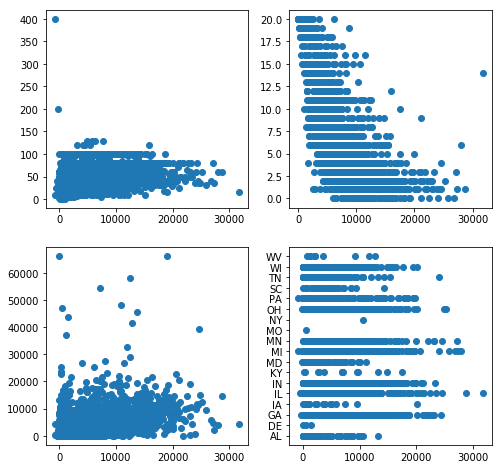

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].scatter(df_inp['Sales'], df_inp['area'])
axs[1, 0].scatter(df_inp['Sales'], df_inp['cig_index'])
axs[0, 1].scatter(df_inp['Sales'], df_inp['Number of GAPs'])
axs[1, 1].scatter(df_inp['Sales'], df_inp['Region'])
plt.show()

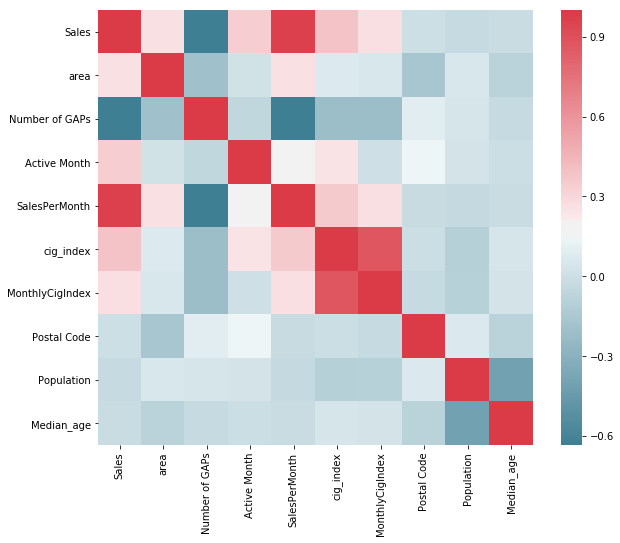

In [50]:
import seaborn as sns

f, ay = plt.subplots(figsize=(10, 8))
corr = df_inp.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ay)

In [51]:
rs = np.random.RandomState(0)
corr = df_inp.corr()
corr.style.background_gradient().set_precision(2)

,Sales,area,Number of GAPs,Active Month,SalesPerMonth,cig_index,MonthlyCigIndex,Postal Code,Population,Median_age
Sales,1,0.26,-0.63,0.35,0.97,0.39,0.27,0.0035,-0.031,-0.019
area,0.26,1,-0.2,0.022,0.26,0.068,0.049,-0.16,0.052,-0.082
Number of GAPs,-0.63,-0.2,1,-0.052,-0.63,-0.21,-0.21,0.088,0.037,-0.028
Active Month,0.35,0.022,-0.052,1,0.2,0.25,0.0075,0.15,0.028,-0.005
SalesPerMonth,0.97,0.26,-0.63,0.2,1,0.36,0.27,-0.024,-0.037,-0.015
cig_index,0.39,0.068,-0.21,0.25,0.36,1,0.88,-0.0074,-0.1,0.039
MonthlyCigIndex,0.27,0.049,-0.21,0.0075,0.27,0.88,1,-0.03,-0.092,0.026
Postal Code,0.0035,-0.16,0.088,0.15,-0.024,-0.0074,-0.03,1,0.066,-0.085
Population,-0.031,0.052,0.037,0.028,-0.037,-0.1,-0.092,0.066,1,-0.4
Median_age,-0.019,-0.082,-0.028,-0.005,-0.015,0.039,0.026,-0.085,-0.4,1


In [53]:
import statsmodels.api as sm
df_inp.columns

Index(['Sold-to Customer', 'Sales', 'Account ID', 'area', 'Region',
       'Customer Group', 'Number of GAPs', 'Active Month', 'SalesPerMonth',
       'cig_index', 'MonthlyCigIndex', 'City', 'Postal Code', 'Plant Name',
       'Population', 'Median_age'],
      dtype='object')

In [89]:
dummy=pd.get_dummies(df_inp['Customer Group'],prefix='CustGrp',prefix_sep='_')
dummy.head()

,CustGrp_CSTORE-OVER 800SQFT,CustGrp_CSTORE-UNDER 800SQFT,CustGrp_EBY INTERNAL ACCOUNT,CustGrp_LIQUOR STORE,CustGrp_OTHER/NON-RETAIL,CustGrp_TOBACCO OUTLET,CustGrp_VENDOR-WHOLESALER WI
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [90]:
df=pd.concat([df_inp,dummy],axis=1)
df.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,...,Plant Name,Population,Median_age,CustGrp_CSTORE-OVER 800SQFT,CustGrp_CSTORE-UNDER 800SQFT,CustGrp_EBY INTERNAL ACCOUNT,CustGrp_LIQUOR STORE,CustGrp_OTHER/NON-RETAIL,CustGrp_TOBACCO OUTLET,CustGrp_VENDOR-WHOLESALER WI
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167,1786.1,...,Ypsilanti,10067.0,48.5,1,0,0,0,0,0,0
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000,188.0,...,Ypsilanti,15209.0,38.6,1,0,0,0,0,0,0
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12,414.701667,608.0,...,Ypsilanti,30288.0,41.1,1,0,0,0,0,0,0
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167,5780.0,...,Ypsilanti,19661.0,36.9,1,0,0,0,0,0,0
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667,8181.7,...,Ypsilanti,3848.0,46.5,1,0,0,0,0,0,0


In [91]:
df.merge(dummy,left_index=True,right_index=True)
df.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,...,Plant Name,Population,Median_age,CustGrp_CSTORE-OVER 800SQFT,CustGrp_CSTORE-UNDER 800SQFT,CustGrp_EBY INTERNAL ACCOUNT,CustGrp_LIQUOR STORE,CustGrp_OTHER/NON-RETAIL,CustGrp_TOBACCO OUTLET,CustGrp_VENDOR-WHOLESALER WI
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167,1786.1,...,Ypsilanti,10067.0,48.5,1,0,0,0,0,0,0
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000,188.0,...,Ypsilanti,15209.0,38.6,1,0,0,0,0,0,0
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12,414.701667,608.0,...,Ypsilanti,30288.0,41.1,1,0,0,0,0,0,0
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167,5780.0,...,Ypsilanti,19661.0,36.9,1,0,0,0,0,0,0
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667,8181.7,...,Ypsilanti,3848.0,46.5,1,0,0,0,0,0,0


In [92]:
df_test1=df.drop(columns=['Customer Group','Region','Plant Name','City'])
df_test1['Number of GAPs'].fillna(np.mean(df_test1['Number of GAPs']),inplace = True)
df_test1.head()

,Sold-to Customer,Sales,Account ID,area,Number of GAPs,Active Month,SalesPerMonth,cig_index,MonthlyCigIndex,Postal Code,Population,Median_age,CustGrp_CSTORE-OVER 800SQFT,CustGrp_CSTORE-UNDER 800SQFT,CustGrp_EBY INTERNAL ACCOUNT,CustGrp_LIQUOR STORE,CustGrp_OTHER/NON-RETAIL,CustGrp_TOBACCO OUTLET,CustGrp_VENDOR-WHOLESALER WI
0,10000,312.35,0016100000Am390AAB,32.0,20.000000,12,26.029167,1786.1,148.841667,48661,10067.0,48.5,1,0,0,0,0,0,0
1,10010,6616.20,0016100000AmFkZAAV,60.0,4.000000,12,551.350000,188.0,15.666667,48130,15209.0,38.6,1,0,0,0,0,0,0
2,10016,4976.42,0016100000Am392AAB,36.0,6.744318,12,414.701667,608.0,50.666667,48178,30288.0,41.1,1,0,0,0,0,0,0
3,10019,1041.17,0016100000Am393AAB,36.0,14.000000,12,86.764167,5780.0,481.666667,49091,19661.0,36.9,1,0,0,0,0,0,0
4,10032,15739.22,00161000009lKUeAAM,36.0,7.000000,12,1311.601667,8181.7,681.808333,48441,3848.0,46.5,1,0,0,0,0,0,0


In [93]:
df_test1['Median_age'].isna()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3617    False
3618    False
3619    False
3620    False
3621    False
3622    False
3623    False
3624    False
3625    False
3626    False
3627    False
3628    False
3629    False
3630    False
3631    False
3632    False
3633    False
3634    False
3635    False
3636    False
3637    False
3638    False
3639    False
3640    False
3641    False
3642    False
3643    False
3644    False
3645    False
3646    False
Name: Median_age, Length: 3647, dtype: bool

In [97]:
from sklearn.model_selection import train_test_split
X = df_test1[['Number of GAPs','area','MonthlyCigIndex','CustGrp_CSTORE-OVER 800SQFT',
            'CustGrp_CSTORE-UNDER 800SQFT','CustGrp_EBY INTERNAL ACCOUNT','CustGrp_LIQUOR STORE',
              'CustGrp_OTHER/NON-RETAIL','CustGrp_TOBACCO OUTLET','CustGrp_VENDOR-WHOLESALER WI']]
X = sm.add_constant(X)
y = df_test1['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 26 Jun 2018   Prob (F-statistic):          7.49e-317
Time:                        21:33:02   Log-Likelihood:                -35176.
No. Observations:                3647   AIC:                         7.037e+04
Df Residuals:                    3637   BIC:                         7.043e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [100]:
dummy1=pd.get_dummies(df_inp['Region'],prefix='Region',prefix_sep='_')
dummy1.head()

,Region_AL,Region_DE,Region_GA,Region_IA,Region_IL,Region_IN,Region_KY,Region_MD,Region_MI,Region_MN,Region_MO,Region_NY,Region_OH,Region_PA,Region_SC,Region_TN,Region_WI,Region_WV
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [101]:
df1=pd.concat([df_inp,dummy1],axis=1)
df1.merge(dummy1,left_index=True,right_index=True)
df1.head()

,Sold-to Customer,Sales,Account ID,area,Region,Customer Group,Number of GAPs,Active Month,SalesPerMonth,cig_index,...,Region_MI,Region_MN,Region_MO,Region_NY,Region_OH,Region_PA,Region_SC,Region_TN,Region_WI,Region_WV
0,10000,312.35,0016100000Am390AAB,32.0,MI,CSTORE-OVER 800SQFT,20.0,12,26.029167,1786.1,...,1,0,0,0,0,0,0,0,0,0
1,10010,6616.20,0016100000AmFkZAAV,60.0,MI,CSTORE-OVER 800SQFT,4.0,12,551.350000,188.0,...,1,0,0,0,0,0,0,0,0,0
2,10016,4976.42,0016100000Am392AAB,36.0,MI,CSTORE-OVER 800SQFT,NaN,12,414.701667,608.0,...,1,0,0,0,0,0,0,0,0,0
3,10019,1041.17,0016100000Am393AAB,36.0,MI,CSTORE-OVER 800SQFT,14.0,12,86.764167,5780.0,...,1,0,0,0,0,0,0,0,0,0
4,10032,15739.22,00161000009lKUeAAM,36.0,MI,CSTORE-OVER 800SQFT,7.0,12,1311.601667,8181.7,...,1,0,0,0,0,0,0,0,0,0


In [102]:
df_test2=df1.drop(columns=['Customer Group','Region','Plant Name','City'])
df_test2['Number of GAPs'].fillna(np.mean(df_test1['Number of GAPs']),inplace = True)
df_test2.head()

,Sold-to Customer,Sales,Account ID,area,Number of GAPs,Active Month,SalesPerMonth,cig_index,MonthlyCigIndex,Postal Code,...,Region_MI,Region_MN,Region_MO,Region_NY,Region_OH,Region_PA,Region_SC,Region_TN,Region_WI,Region_WV
0,10000,312.35,0016100000Am390AAB,32.0,20.000000,12,26.029167,1786.1,148.841667,48661,...,1,0,0,0,0,0,0,0,0,0
1,10010,6616.20,0016100000AmFkZAAV,60.0,4.000000,12,551.350000,188.0,15.666667,48130,...,1,0,0,0,0,0,0,0,0,0
2,10016,4976.42,0016100000Am392AAB,36.0,6.744318,12,414.701667,608.0,50.666667,48178,...,1,0,0,0,0,0,0,0,0,0
3,10019,1041.17,0016100000Am393AAB,36.0,14.000000,12,86.764167,5780.0,481.666667,49091,...,1,0,0,0,0,0,0,0,0,0
4,10032,15739.22,00161000009lKUeAAM,36.0,7.000000,12,1311.601667,8181.7,681.808333,48441,...,1,0,0,0,0,0,0,0,0,0


In [104]:
from sklearn.model_selection import train_test_split
X = df_test2[['Number of GAPs','area','MonthlyCigIndex','Region_AL', 'Region_DE',
       'Region_GA', 'Region_IA', 'Region_IL', 'Region_IN', 'Region_KY',
       'Region_MD', 'Region_MI', 'Region_MN', 'Region_MO', 'Region_NY',
       'Region_OH', 'Region_PA', 'Region_SC', 'Region_TN', 'Region_WI',
       'Region_WV']]
X = sm.add_constant(X)
y = df_test2['SalesPerMonth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:          SalesPerMonth   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     88.60
Date:                Tue, 26 Jun 2018   Prob (F-statistic):          1.36e-294
Time:                        22:21:24   Log-Likelihood:                -26137.
No. Observations:                3647   AIC:                         5.232e+04
Df Residuals:                    3626   BIC:                         5.245e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             409.0528     32.698     

# Failed scenarios

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = df_inp[['BAC','FC','area','cig_index','Qty']]
X = sm.add_constant(X)
y = df_inp["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model= RandomForestRegressor(n_estimators=100, max_depth=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test) 
accuracy=round(model.score(X_test, y_test)*100,2)
print(str(accuracy)+' percent')

In [ ]:
y_pred

In [ ]:
# The coefficients
#regr=RandomForestRegressor()
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))



In [ ]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg1=LinearRegression()
X = df_inp[['BAC','FC','area','cig_index','Qty']]
X = sm.add_constant(X)
y = df_inp["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
reg1.fit(X_train,y_train)
pred1=reg1.predict(X_test) 
accuracy=round(reg1.score(X_test, y_test)*100,2)
print(str(accuracy)+' percent')

In [ ]:

pred1


In [ ]:
regr = linear_model.LinearRegression()
# The coefficients
#print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred1))



In [ ]:
# Plot outputs
#plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred1, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()